In [41]:
import os
import csv
from collections import Counter
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#El csv debe estar en el mismo folder del archivo python
current_dir = os.getcwd()
filename = "Estadisticas.csv"

dataset_path = os.path.join(current_dir, filename)
df = pd.read_csv(dataset_path)

df.head()

,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Sexo,Nacionalidad,Provincia,Canton,Distrito
0,ASALTO,ARMA BLANCA,2023-02-01,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,MUJER,COSTA RICA,SAN JOSE,SANTA ANA,NaN
1,ASALTO,ARMA BLANCA,2023-02-04,03:00:00 - 05:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,DESCONOCIDO,COSTA RICA,SAN JOSE,SAN JOSE,NaN
2,ASALTO,ARMA BLANCA,2023-02-08,12:00:00 - 14:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,CARTAGO,PARAISO,NaN
3,ASALTO,ARMA BLANCA,2023-02-20,00:00:00 - 02:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,MUJER,COSTA RICA,ALAJUELA,OROTINA,NaN
4,ASALTO,ARMA BLANCA,2023-02-19,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Desconocido,MUJER,COSTA RICA,CARTAGO,OREAMUNO,NaN


# Analisis Exploratorio de Datos

In [42]:
df.columns

Index(['Delito', 'SubDelito', 'Fecha', ' Hora', 'Victima', 'SubVictima',
       'Edad', 'Sexo', 'Nacionalidad', 'Provincia', 'Canton', 'Distrito'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96878 entries, 0 to 96877
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Delito        96878 non-null  object 
 1   SubDelito     96878 non-null  object 
 2   Fecha         96878 non-null  object 
 3    Hora         96878 non-null  object 
 4   Victima       96878 non-null  object 
 5   SubVictima    96878 non-null  object 
 6   Edad          96878 non-null  object 
 7   Sexo          96878 non-null  object 
 8   Nacionalidad  96878 non-null  object 
 9   Provincia     96878 non-null  object 
 10  Canton        96878 non-null  object 
 11  Distrito      0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 8.9+ MB


In [44]:
# Drop de la columna Distrito ya que no aporta datos
if 'Distrito' in df.columns:
    df.drop('Distrito', axis=1, inplace=True)

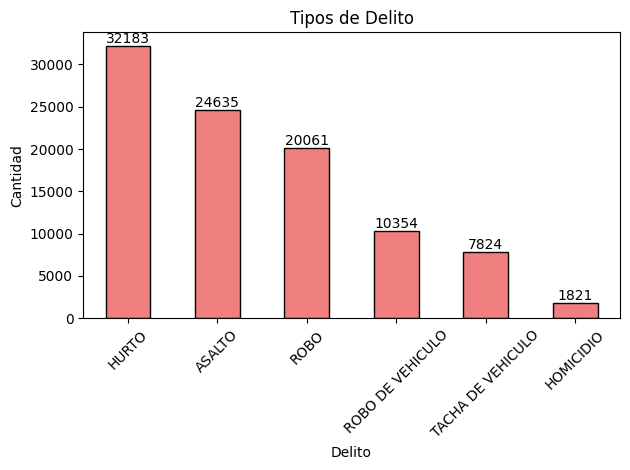

In [45]:
delitos = df['Delito'].value_counts()

delitos.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Tipos de Delito')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Agregar el total sobre cada barra
for i, count in enumerate(delitos):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [46]:
df['SubDelito'].value_counts()

SubDelito
POR DESCUIDO                      16839
FORZADURA                         11092
ARMA DE FUEGO                      9530
TACHA DE VEHICULO                  7824
POR CONFIANZA                      6108
CARTERISTA                         5947
ARMA BLANCA                        5662
DESCUIDO                           5413
ARREBATO                           3718
BOQUETE                            2554
GOLPES                             2408
ESCALAMIENTO                       2373
ASALTO                             2264
OTRO O INDETERMINADO               2172
COCHERAZO                          1537
CORTA CANDADOS                     1281
ARDID PREVIO/DISTRACCION           1279
INTIMIDACION VERBAL                1274
RUPTURA VENTANA                    1271
AJUSTE DE CUENTAS/VENGANZA         1257
CON LLAVE                           927
QUITAN CELOSIAS                     873
CANDADO CHINO                       732
INMOVILIZACION                      668
PROGRESIVOS                   